In [22]:
# 머신 러닝
# Input, label을 활용하여 규칙을 찾게하는 과정
# 1.학습 방식 (머신러닝의 큰 뼈대)
# 1) 지도 학습 : label이 있다
# 분류(Classification) : 데이터를 몇가지 범주로 나누는 것 (예 : 스팸 메일 분류, 고양이/강아지 사진 분류)
# 회귀 (Regression) : 숫자를 예측하는 것 ( 예 : 집값 예측, 주식 가격 예측)
# -K-NN, Decision Tree, Support Vector Machine

# $$$ K-NN (K-Nearest Neighbors) $$$
# 거리 기반의 비모수적(Non-parametric) 학습방법 *비모수적: 모델이 특정한 형태를 가정하지 않음
# 학습 방식 : Lazy(학습 X)
# 단순 데이터 저장 -> 예측 시점에 주변 데이터(k개)를 참고하여 결정
# 거리 측정은 유클리드 거리
# 장점 : 구현이 간단, 직관적, 데이터에 대한 가정이 거의 없음
# 단점 : 큰 데이터셋에서는 속도가 느림, 차원의 저주 문제 있음
# K값 선택이 중요 (작으면 과적합, 크면 과소적합)

# $$$ 결정트리 (Decision Tree) $$$
# 학습 방식 : Greedy (트리 분할)
# 데이터를 분학하는 방식으로 분류하거나 회귀를 수행
# 질문(조건문)을 반보갛면서 트리를 만들어 최종적으로 예측값을 얻음
# 데이터에서 가장 좋은 속성(정보 이득이 큰 속성)을 선택하여 분기
# 분기를 반복하면서 리프 노드에 도달하면, 그 노드의 클래스로 예측
# *엔트로피, 지니지수(Gini index) : 노드의 불순도를 측정
# * 정보 이득 : 분할 전후의 엔트로피 차이
# 장점 : 이해하기 쉽고 시각화 가능, 전처리가 거의 필요 없음(정규화, 스케일링 등)
# 단점 : 과적합(overfitting) 가능성이 큼, 작은 변화에도 구조가 많이 달라짐

# $$$ SVM (Support Vector Machine) $$$
# 두 클래스 사이의 최적의 경계(초평면, Hyperplane)를 찾아 분류
# 경계와 각 클래스 사이의 Margin(여유 거리)을 최대화 하는 것이 목표
# 학습 방식 : Optimization (마진 최대화) 클래스 간의 간격을 최대화하는 결정 경계를 학습
# 마진을 기준으로 데이터 포인트를 분리, 마진 근처의 점(서포트 벡터)에 의해 결정
# 선형 분리가 안되는 경우, 커널 트릭을 사용하여 고차원으로 매핑 후 분리
# 장점 : 고차원 데이터에 강함, 마진 기반의 강력한 일반화 능력
# 단점 : 커널 및 하이퍼파라미터 선택이 어려움, 대용량 데이터셋에는 느릴 수 있


# 2) 비지도 학습 : label이 없다.
# 군집(Clustering) : 비슷한 데이터끼리 그룹으로 묶어주는 것(예: 고객 유형 분석)
#                    - KMeans (K-평균): 군집 중심점(Centroid)을 기준으로 데이터를 그룹화 (K개로 나눔)
#                    - DBSCAN: 데이터의 밀도(Density)를 기준으로 군집을 찾음 (복잡한 모양, 노이즈에도 강함)
# 차원 축소(Dimensionality Reduction) : 데이터의 정보는 최대한 유지하면서 특성(차원)의 개수를 줄이는 기술 (예 : PCA)
#                                       데이터가 너무 많으면 분석하기 어렵고 시각화도 힘들기 때문에, 중요한 것만 남기고 압축하는 것
# (군집알고리즘) 자주 쓰는 함수 모음
# KMeans(): K-평균 군집화 알고리즘을 사용할 때 쓰는 함수
# DBSCAN(): 밀도 기반 군집화 알고리즘을 사용할 때 쓰는 함수
# AgglomerativeClustering(): 계층적 군집화 알고리즘을 사용할 때 쓰는 함수
# silhouette_score(): 군집화 품질을 평가하는 실루엣 점수를 계산하는 함수
# (차원 축소) 자주 쓰는 함수 모음
# PCA(): 주성분 분석으로 차원을 축소하는 함수
# TSNE(): t-SNE 알고리즘으로 고차원 데이터를 시각화하기 좋게 축소하는 함수

# 3) 강화학습 : 보상 (reward)을 통해 학습 (예 : 알파고, 자율주행)

In [1]:
# 2.데이터 준비(모델 학습 전 필수 과정)
# 1) 데이터 전처리 (Data Preprocessing): 지저분한 데이터를 머신러닝 모델이 잘 이해할 수 있도록 깔끔하게 다듬고 변환하는 모든 과정
#  - 결측치 처리 : 비어있는 값 채우기
#  - 특성 스케일링 : 데이터 값들의 범위를 일정하게 맞춰주기 (예: 정규화, 표준화)
#  - 원핫인코딩 :  '빨강', '파랑' 같은 문자형 데이터를 0과 1로 된 숫자형 벡터로 바꿔줘서 컴퓨터가 인식하게 만듦

# 2) 특성 공학 (Feature Engineering): 기존의 특성들을 조합하거나 변형해서 모델의 성능을 높일 수 있는 새롭고 더 유용한 특성을 만들어내는 창조적인 작업

# (데이터 준비) 자주쓰는 함수 모음
# train_test_split(): 데이터를 훈련용과 테스트용으로 나눠주는 함수
# StandardScaler(): 데이터를 평균 0, 표준편차 1로 정규화해주는 함수
# MinMaxScaler(): 데이터를 0~1 사이의 값으로 스케일링해주는 함수
# OneHotEncoder(): 범주형 데이터를 원-핫 인코딩으로 변환해주는 함수
# make_blobs(): 군집화 테스트용 데이터를 생성해줘요

# numpy 핵심 함수
# np.array(): 배열을 생성하는 함수
# np.mean(), np.median(), np.std(): 평균, 중앙값, 표준편차를 계산하는 함수들
# np.random.rand(), np.random.randn(): 난수를 생성하는 함수들
# np.dot(): 행렬 곱셈을 수행하는 함수
# np.reshape(): 배열의 모양을 변경하는 함수

# pandas 핵심 함수
# pd.read_csv(), pd.read_excel(): CSV, Excel 파일을 읽어오는 함수들
# df.head(), df.tail(): 데이터프레임의 처음/끝 부분을 보여주는 함수들
# df.describe(): 데이터의 기술 통계량을 보여주는 함수
# df.groupby(): 데이터를 그룹화하는 함수
# df.merge(): 두 데이터프레임을 병합하는 함수
# df.fillna(): 결측치를 채우는 함수

In [2]:
# 3. 모델 학습 및 평가
# 1) 과적합(Overfitting) & 과소적합(Underfitting)
# - 과적합 : 모델이 학습 데이터를 너무 '외워버려서' 새로운 데이터에는 약한 경우
# - 과소적합 : 모델이 학습 데이터를 제대로 '이해하지 못해서' 학습 데이터에서도, 새로운 데이터에서도 성능이 나쁜 경우

# 2) 엘보우 기법 : K-means 같은 군집 알고리즘에서 **최적의 군집 개수(K)**를 찾는 아주 유용한 시각화 방법 그래프가 팔꿈치처럼 꺾이는 부분의 갯수가 K값

# 3) 교차 검증 :  (Cross-validation): 모델 성능을 평가할 때 데이터 전체를 딱 한 번만 나누지 않고,
#                                    여러 번 다르게 나눠서 모델을 검증하는 방식 훨씬 신뢰도 높은 모델 성능을 측정할 수 있음

# (모델 학습 및 평가) 자주쓰는 함수 모음
# fit(): 모든 머신러닝 모델에서 데이터를 학습시킬 때 쓰는 가장 기본 함수
# predict(): 학습된 모델로 예측할 때 쓰는 함수
# score(): 모델의 성능을 평가하는 함수
# cross_val_score(): 교차 검증을 통해 모델의 성능을 평가하는 함수
# GridSearchCV(): 하이퍼파라미터 최적화를 위한 격자 탐색을 수행하는 함수
# confusion_matrix(): 분류 모델의 성능을 평가하는 혼동 행렬을 생성하는 함수
# classification_report(): 정밀도, 재현율, F1 점수 등을 포함한 분류 보고서를 생성하는 함수

In [ ]:
# 4. 시각화 
# (시각화) 자주쓰는 함수 모음
# plt.figure(): 새로운 그래프 창을 생성하는 함수
# plt.plot(): 선 그래프를 그리는 함수
# plt.scatter(): 산점도를 그리는 함수
# plt.hist(): 히스토그램을 그리는 함수
# plt.bar(): 막대 그래프를 그리는 함수
# plt.title(), plt.xlabel(), plt.ylabel(): 그래프의 제목과 축 이름을 설정하는 함수들
# plt.legend(): 그래프에 범례를 추가하는 함수
# sns.heatmap(): 히트맵을 그리는 함수 상관관계 분석할 때 유용함

In [3]:
# 군집 알고리즘 (Clustering)
# -K-Means Clustering
# 핵심 개념 : 사용자가 지정한 K개의 군집을 설정하기 위해
# 중심점을 설정하고, 각 데이터 포인터를 가장 가까운 중심점에 할당

# 순서
# 1) K개의 중심점을 설정
# 2) 할당 : 모든 데이터를 가장 가까운 중심점에 할당
# 3) 이동 : 각 군집의 중심점을 해당 군집에 속한 데이터들의 평균 위치로 이동

In [ ]:
# sklearn
# 오픈소스 머신러닝 라이브러리

# 1. 지도학습
# 데이터와 정답(레이블)을 함께 학습해서 미래를 예측하는 모델을 만들 때 사용
# 1) 분류 : 데이터를 여러 카테고리 중 하나로 나누는 문제
# 로지스틱 회귀
# 서포트 벡터 머신 (SVM)
# 결정트리 (Decision Trees)
# 랜덤 포레스트 (Random Forests)
# KNN (K-최근접 이웃)
# 2) 회귀 : 연속적인 숫자 값을 예측하는 문제
# 선형 회귀
# 릿지, 라쏘

# 2. 비지도 학습
# 정답(레이블) 없이 데이터 자체의 패턴을 찾아내는 모델을 만들때 사용
# 클러스트링 : 비슷한 데이터들을 그룹으로 묶는 문제
# K-평균 (K-Means)
# DBSCAN
# 차원 축소 : 데이터의 특징(컬럼)이 너무 많을 때, 중요한 정보만 유지하면서 줄이는 기술

# 3. 데이터 전처리
# 머신러닝 모델이 데이터를 잘 이해하고 학습할 수 있도록 데이터를 준비하는 과정
# 1) 스케일링 : 데이터의 크기를 조정해서 모델이 특정 특성에만 치우치지 않도록 균등하게 만들어줌
# StandardScaler (표준화)
# MinMaxScaler (정규화)
# 2) 인코딩 : 문자열 데이터를 숫자로 바꿔줌
# OneHotEncoder
# LabelEncoder

# 4. 모델 선택 및 평가
# 만든 모델이 얼마나 잘 작동하는지 측정, 최적의 모델을 고르는데 사용
# train_tests_split() : 데이터를 훈련용과 테스트용으로 나눠줌
# cross_val_score() : 교차 검증을 통해 모델의 성능을 더 신뢰성 있게 평가
# 다양한 성능 지표 (Metrics)
# 분류 : accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# 회귀 : mean_squared_error (MSE), r2_score

In [12]:
# 1) 임의의 데이터
from sklearn.datasets import make_blobs # 군집용 데이터 생성

import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans # 군집 알고리즘

# 속성 (200개 데이터, 2개의 특징, 최종 군집 개수 4개, 군집 표준 편차) 
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, random_state=42) # make_blobs은 훈련용으로 단순한 인공데이터라 특성에 의미가 있지 않음

# 엘보우 기법을 통해 k를 찾아보자
k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(X)


C:\Users\82103\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

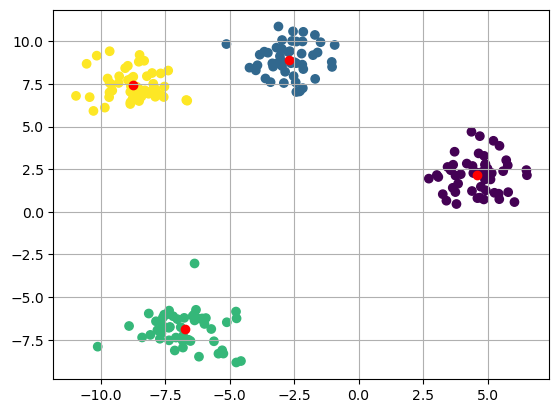

In [17]:
# 각 군집의 중심점 좌표, 군집 label
centors = kmeans.cluster_centers_ # 중심점 좌표
labels = kmeans.labels_ # 군집된 결과

# 이 결과를 토대로 시각화
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[: , 1], c = labels) # 군집된 데이터 시각화
plt.scatter(centors[:, 0], centors[:, 1], c = "red")
plt.grid(True)
plt.show()

C:\Users\82103\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82103\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82103\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82103\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

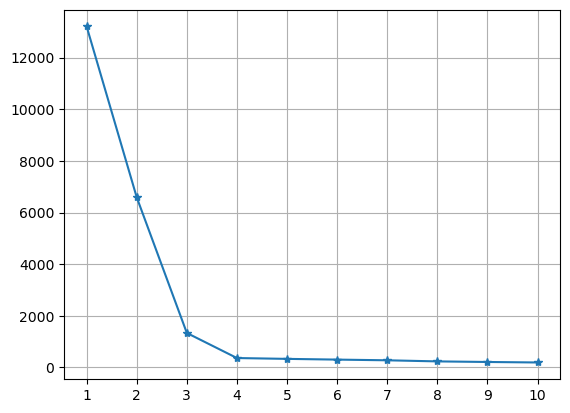

In [21]:
# 엘보우 방법을 이요한 최적의 k찾기
k_range = range(1, 11)

inertia_list = []

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_) # 군집 내 데이터들과 중심점 사이의 거리

plt.plot(k_range, inertia_list,marker='*')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [ ]:
# sklearn : 머신러닝의 가장 기본적인 라이브러리, 머신러닝의 알고리즘 및 데이터 처리 도구 kit
# Kmeans : 가장 대표적인 군집 알고리즘
# DBSCAN : 군집알고리즘 (밀도기반), 데이터 모양이 복잡하거나 노이즈가 많은 경우에 K-Means보다 좋은 결과를 줄떄도 있다
# 엘보우 기법 : K-means 처럼 군집 개수(K)를 미리 정해야 하는 알고리즘에서 최적의 K를 찾아주는 아주 유용한 방법
# One-Hot Encoding : 문자열로 된 범주형 데이터를 숫자 형태로 바꿔주는 기법

In [9]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/quakes.csv")
df

,rownames,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...,...
995,996,-25.93,179.54,470,4.4,22
996,997,-12.28,167.06,248,4.7,35
997,998,-20.13,184.20,244,4.5,34
998,999,-17.40,187.80,40,4.5,14


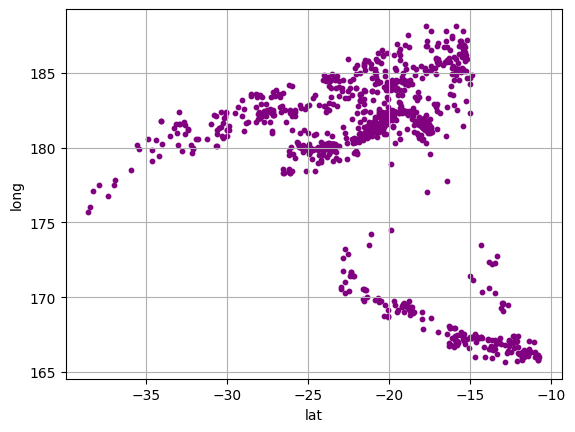

<Figure size 2000x1600 with 0 Axes>

In [35]:
X = df[["lat", "long"]]
X = X.values # value 값만 

plt.grid(True)
plt.xlabel("lat")
plt.ylabel("long")
plt.scatter(X[:, 0], X[:, 1], s=10,c="purple")
plt.figure(figsize=(20, 16))

plt.show()

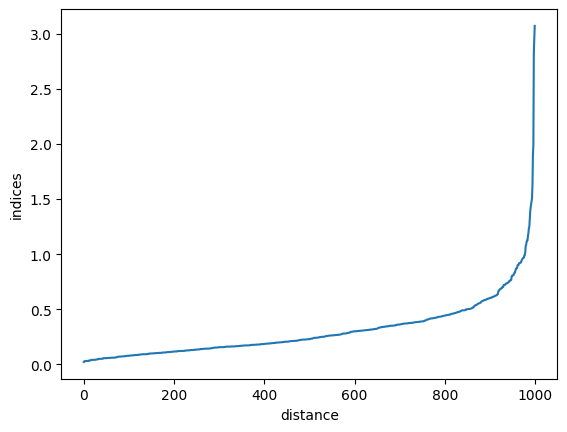

In [40]:
from sklearn.neighbors import NearestNeighbors

k = 4
nn = NearestNeighbors(n_neighbors=k)
neighbor = nn.fit(X)
distance, indices = neighbor.kneighbors(X)

import numpy as np
dist_sorted = np.sort(distance[:, k - 1], axis = 0)
plt.xlabel("distance")
plt.ylabel("indices")
plt.plot(dist_sorted)
plt.show()


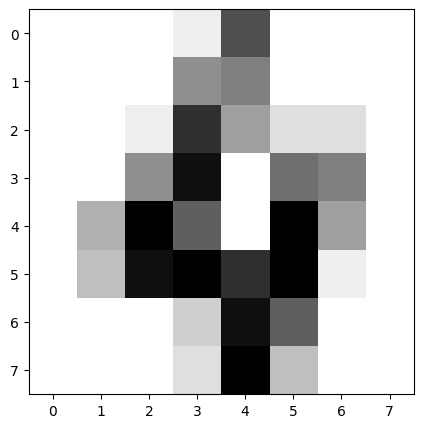

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
image = digits["images"][4]

plt.figure(figsize=(5,5))
plt.imshow(image, cmap="binary", interpolation="nearest")
plt.show()